## Title + Team Members

In [19]:
# COP 4283 Project
# Jonathan Gyure
# Darien Hernandez
# Ricky Villaverde
# Leonel Marines
# Wyatt Wetzler

## Import Dataset

In [20]:
import pandas as pd

# Load CSV
df = pd.read_csv("/Users/leonelmarines/Desktop/TeamStatistics2.csv")

df.head()


,gameId,gameDa,teamCity,teamName,teamId,opponentTeamCity,opponentTeamName,opponentTeamId,home,win,...,leadChanges,pointsFastBreak,pointsFromTurnovers,pointsInThePaint,pointsSecondChance,timesTied,timeoutsRemaining,seasonWins,seasonLosses,coachId
0,22500141,2025-10-30,Miami,Heat,1610612748,San Antonio,Spurs,1610612759,0,0,...,12.0,9.0,14.0,42.0,14.0,4.0,0.0,3.0,2.0,NaN
1,22500141,2025-10-30,San Antonio,Spurs,1610612759,Miami,Heat,1610612748,1,1,...,12.0,18.0,19.0,40.0,16.0,4.0,1.0,5.0,0.0,NaN
2,22500139,2025-10-30,Golden State,Warriors,1610612744,Milwaukee,Bucks,1610612749,0,0,...,16.0,17.0,25.0,44.0,15.0,5.0,0.0,4.0,2.0,NaN
3,22500139,2025-10-30,Milwaukee,Bucks,1610612749,Golden State,Warriors,1610612744,1,1,...,16.0,12.0,27.0,50.0,12.0,5.0,1.0,4.0,1.0,NaN
4,22500140,2025-10-30,Oklahoma City,Thunder,1610612760,Washington,Wizards,1610612764,1,1,...,3.0,14.0,26.0,50.0,12.0,3.0,1.0,6.0,0.0,NaN


## Convert gameDa to datetime

In [21]:
df["gameDa"] = pd.to_datetime(df["gameDa"], errors="coerce")

print("Date range:", df["gameDa"].min(), "to", df["gameDa"].max())

Date range: 1946-11-26 00:00:00 to 2025-10-30 00:00:00


## Filter dataset to 2014–present & save

In [22]:
df["gameDa"] = pd.to_datetime(df["gameDa"], errors="coerce")

start_date = pd.Timestamp("2014-10-28")
df_clean = df[df["gameDa"] >= start_date].copy()

print("Filtered shape:", df_clean.shape)
print("New date range:", df_clean["gameDa"].min(), "to", df_clean["gameDa"].max())

df_clean.to_csv("/Users/leonelmarines/Desktop/TeamStatistics_2014_to_present.csv", index=False)


Filtered shape: (30076, 48)
New date range: 2014-10-28 00:00:00 to 2025-10-30 00:00:00


## Reload cleaned dataset

In [23]:
df = pd.read_csv("/Users/leonelmarines/Desktop/TeamStatistics_2014_to_present.csv")
df["gameDa"] = pd.to_datetime(df["gameDa"], errors="coerce")

## Assign NBA Seasons

In [24]:
season_dates = {
    "2014-15": ("2014-10-28", "2015-04-15"),
    "2015-16": ("2015-10-27", "2016-04-13"),
    "2016-17": ("2016-10-25", "2017-04-12"),
    "2017-18": ("2017-10-17", "2018-04-11"),
    "2018-19": ("2018-10-16", "2019-04-10"),
    "2019-20": ("2019-10-22", "2020-08-14"),
    "2020-21": ("2020-12-22", "2021-05-16"),
    "2021-22": ("2021-10-19", "2022-04-10"),
    "2022-23": ("2022-10-18", "2023-04-09"),
    "2023-24": ("2023-10-24", "2024-04-14"),
    "2024-25": ("2024-10-22", "2025-04-13")
}

df["season"] = None

for season, (start, end) in season_dates.items():
    start_dt = pd.to_datetime(start)
    end_dt = pd.to_datetime(end)
    mask = (df["gameDa"] >= start_dt) & (df["gameDa"] <= end_dt)
    df.loc[mask, "season"] = season

df["season"].value_counts().sort_index()

season
2014-15    2460
2015-16    2460
2016-17    2460
2017-18    2460
2018-19    2460
2019-20    2184
2020-21    2160
2021-22    2460
2022-23    2460
2023-24    2462
2024-25    2452
Name: count, dtype: int64

## Build Season-Level Dataset

In [25]:
df["win"] = df["win"].astype(int)

season_db = (
    df.groupby(["season","teamId","teamName","teamCity"], as_index=False)
      .agg(
          games=("gameId","nunique"),
          wins=("win","sum"),
          pts_scored=("teamScore","sum"),
          pts_allowed=("opponentScore","sum"),
          ast_total=("assists","sum"),
          blk_total=("blocks","sum"),
          stl_total=("steals","sum"),
          fga_total=("fieldGoalsAttempted","sum"),
          fgm_total=("fieldGoalsMade","sum"),
          fg_pct_avg=("fieldGoalsPercentage","mean"),
          tpa_total=("threePointersAttempted","sum"),
          tpm_total=("threePointersMade","sum"),
          tp_pct_avg=("threePointersPercentage","mean"),
          fta_total=("freeThrowsAttempted","sum"),
          ftm_total=("freeThrowsMade","sum"),
          ft_pct_avg=("freeThrowsPercentage","mean"),
          dreb_total=("reboundsDefensive","sum"),
          oreb_total=("reboundsOffensive","sum"),
          treb_total=("reboundsTotal","sum"),
          fouls_total=("foulsPersonal","sum"),
          tov_total=("turnovers","sum"),
          plusminus_total=("plusMinusPoints","sum"),
          bench_pts_total=("benchPoints","sum"),
          fastbreak_pts_total=("pointsFastBreak","sum"),
          tov_pts_total=("pointsFromTurnovers","sum"),
          paint_pts_total=("pointsInThePaint","sum"),
          secondchance_pts_total=("pointsSecondChance","sum")
      )
)

# derived metrics
season_db["losses"] = season_db["games"] - season_db["wins"]
season_db["win_pct"] = season_db["wins"] / season_db["games"]
season_db["pts_per_game"] = season_db["pts_scored"] / season_db["games"]
season_db["opp_pts_per_game"] = season_db["pts_allowed"] / season_db["games"]
season_db["pt_diff_per_game"] = season_db["pts_per_game"] - season_db["opp_pts_per_game"]

season_db["ast_per_game"] = season_db["ast_total"] / season_db["games"]
season_db["reb_per_game"] = season_db["treb_total"] / season_db["games"]
season_db["tov_per_game"] = season_db["tov_total"] / season_db["games"]

season_db.head()

,season,teamId,teamName,teamCity,games,wins,pts_scored,pts_allowed,ast_total,blk_total,...,paint_pts_total,secondchance_pts_total,losses,win_pct,pts_per_game,opp_pts_per_game,pt_diff_per_game,ast_per_game,reb_per_game,tov_per_game
0,2014-15,1610612737,Hawks,Atlanta,82,60,8409,7964,2111.0,380.0,...,0.0,0.0,22,0.731707,102.548780,97.121951,5.426829,25.743902,40.560976,14.231707
1,2014-15,1610612738,Celtics,Boston,82,40,8312,8299,2009.0,294.0,...,0.0,0.0,42,0.487805,101.365854,101.207317,0.158537,24.500000,43.841463,13.817073
2,2014-15,1610612739,Cavaliers,Cleveland,82,53,8457,8090,1814.0,340.0,...,0.0,0.0,29,0.646341,103.134146,98.658537,4.475610,22.121951,42.963415,14.280488
3,2014-15,1610612740,Pelicans,New Orleans,82,45,8147,8082,1806.0,510.0,...,0.0,0.0,37,0.548780,99.353659,98.560976,0.792683,22.024390,43.451220,13.256098
4,2014-15,1610612741,Bulls,Chicago,82,50,8265,8019,1781.0,476.0,...,0.0,0.0,32,0.609756,100.792683,97.792683,3.000000,21.719512,45.743902,13.963415


## Prepare Modeling Dataset

In [26]:
data = season_db.copy()

y = data["wins"]
X = data.drop([
    "season", "teamId", "teamName", "teamCity", "wins", "losses"
], axis=1)

X.columns

Index(['games', 'pts_scored', 'pts_allowed', 'ast_total', 'blk_total',
       'stl_total', 'fga_total', 'fgm_total', 'fg_pct_avg', 'tpa_total',
       'tpm_total', 'tp_pct_avg', 'fta_total', 'ftm_total', 'ft_pct_avg',
       'dreb_total', 'oreb_total', 'treb_total', 'fouls_total', 'tov_total',
       'plusminus_total', 'bench_pts_total', 'fastbreak_pts_total',
       'tov_pts_total', 'paint_pts_total', 'secondchance_pts_total', 'win_pct',
       'pts_per_game', 'opp_pts_per_game', 'pt_diff_per_game', 'ast_per_game',
       'reb_per_game', 'tov_per_game'],
      dtype='object')

## Train/Test Split

In [27]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

## Standardize Data

In [28]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Correlation Heatmap

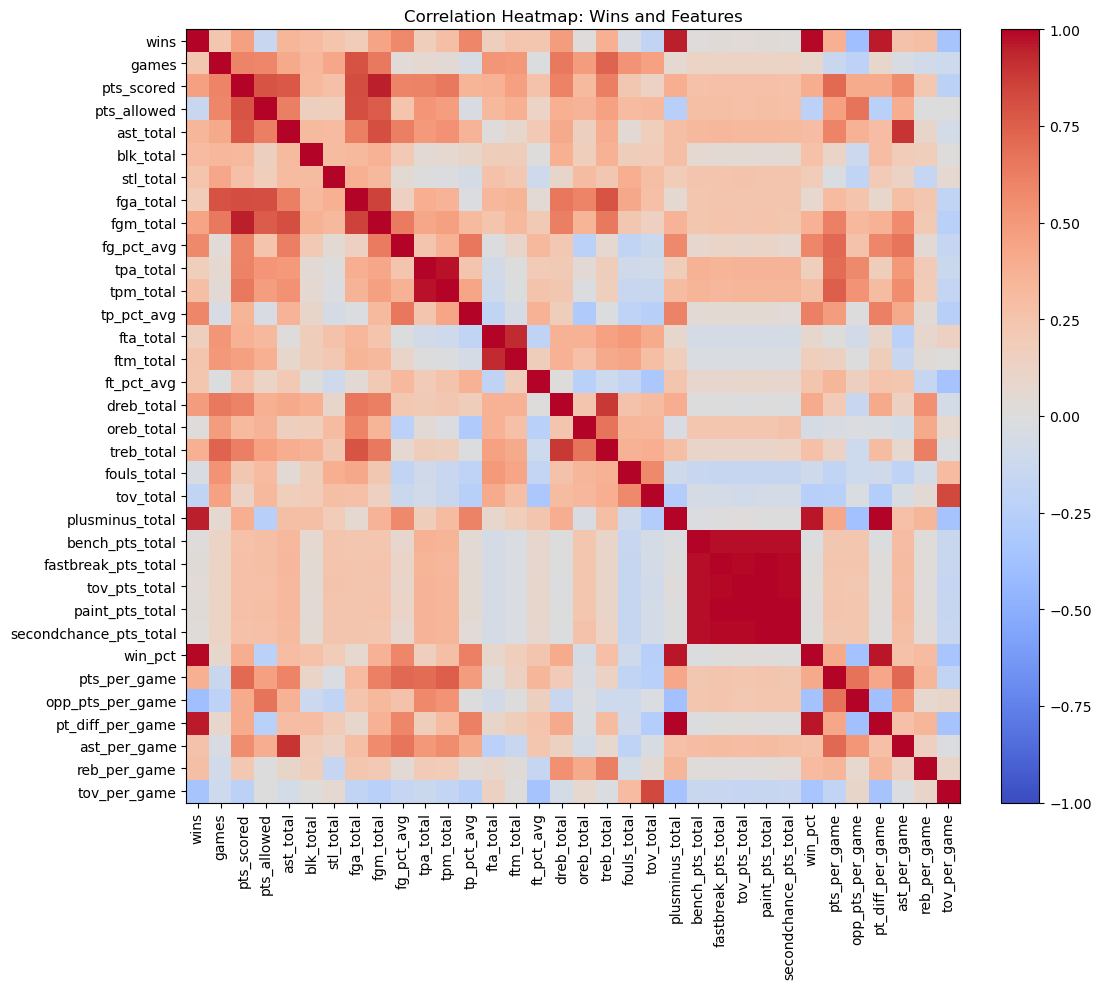

In [29]:
import matplotlib.pyplot as plt
import numpy as np

corr_cols = ["wins"] + list(X.columns)
corr = data[corr_cols].corr()

plt.figure(figsize=(12,10))
im = plt.imshow(corr, cmap="coolwarm", vmin=-1, vmax=1)
plt.colorbar(im, fraction=0.046, pad=0.04)
plt.xticks(range(len(corr_cols)), corr_cols, rotation=90)
plt.yticks(range(len(corr_cols)), corr_cols)
plt.title("Correlation Heatmap: Wins and Features")
plt.tight_layout()
plt.show()

## Linear Regression

In [30]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

lin = LinearRegression()
lin.fit(X_train_scaled, y_train)

pred_lin = lin.predict(X_test_scaled)

lin_r2 = r2_score(y_test, pred_lin)
lin_rmse = np.sqrt(mean_squared_error(y_test, pred_lin))

print(f"Linear R²:  {lin_r2:.4f}")
print(f"Linear RMSE: {lin_rmse:.4f}")


Linear R²:  0.9997
Linear RMSE: 0.1941


## LASSO Regression

In [31]:
from sklearn.linear_model import LassoCV

lasso = LassoCV(cv=10, random_state=42)
lasso.fit(X_train_scaled, y_train)

pred_lasso = lasso.predict(X_test_scaled)

lasso_r2 = r2_score(y_test, pred_lasso)
lasso_rmse = np.sqrt(mean_squared_error(y_test, pred_lasso))

print(f"LASSO R²: {lasso_r2:.4f}")
print(f"LASSO RMSE: {lasso_rmse:.4f}")

lasso_importance = pd.DataFrame({
    "feature": X.columns,
    "coef": lasso.coef_
}).sort_values("coef", key=lambda c: abs(c), ascending=False)

lasso_importance

LASSO R²: 0.9989
LASSO RMSE: 0.3947


,feature,coef
26,win_pct,11.499456
0,games,1.768195
20,plusminus_total,1.738913
29,pt_diff_per_game,-1.367898
3,ast_total,0.115864
31,reb_per_game,-0.100318
14,ft_pct_avg,-0.059573
27,pts_per_game,-0.052120
11,tp_pct_avg,-0.048308
16,oreb_total,0.044478


## Random Forest

In [32]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(
    n_estimators=500,
    random_state=42
)

rf.fit(X_train, y_train)
pred_rf = rf.predict(X_test)

rf_r2 = r2_score(y_test, pred_rf)
rf_rmse = np.sqrt(mean_squared_error(y_test, pred_rf))

print(f"Random Forest R²:  {rf_r2:.4f}")
print(f"Random Forest RMSE: {rf_rmse:.4f}")

rf_importance = pd.DataFrame({
    "feature": X.columns,
    "importance": rf.feature_importances_
}).sort_values("importance", ascending=False)

rf_importance.head(15)

Random Forest R²:  0.9919
Random Forest RMSE: 1.0872


,feature,importance
26,win_pct,0.975406
0,games,0.003225
29,pt_diff_per_game,0.003201
20,plusminus_total,0.003079
6,fga_total,0.001744
7,fgm_total,0.001368
17,treb_total,0.001171
5,stl_total,0.001165
18,fouls_total,0.001126
19,tov_total,0.000918


## Scatter Plot (Altair)

In [33]:
import altair as alt

scatter_data = data.copy()

scatter_chart = (
    alt.Chart(scatter_data)
      .mark_circle()
      .encode(
          x="pt_diff_per_game",
          y="wins",
          color="season:N",
          tooltip=["season","teamName","wins","pt_diff_per_game"]
      )
      .properties(width=500, height=350)
)

season_dropdown = alt.binding_select(options=sorted(scatter_data["season"].unique()))
season_param = alt.param(name="Season", bind=season_dropdown, value=scatter_data["season"].unique()[0])

interactive_scatter = (
    scatter_chart
    .add_params(season_param)
    .transform_filter(season_param == alt.datum.season)
)

interactive_scatter

alt.Chart(...)

## Create Placeholder 2025–26 Season

In [34]:
placeholder_2025 = season_db[season_db["season"] == "2024-25"].copy()
placeholder_2025["season"] = "2025-26"

season_db = pd.concat([season_db, placeholder_2025], ignore_index=True)

data = season_db.copy()

print("Added placeholder 2025–26 season:")
print(data["season"].value_counts().sort_index())

Added placeholder 2025–26 season:
season
2014-15    30
2015-16    30
2016-17    30
2017-18    30
2018-19    30
2019-20    30
2020-21    30
2021-22    30
2022-23    30
2023-24    30
2024-25    30
2025-26    30
Name: count, dtype: int64


## Rebuild Modeling Dataset

In [35]:
y = data["wins"]

X = data.drop([
    "season","teamId","teamName","teamCity","wins","losses"
], axis=1)

X.shape, y.shape

((360, 33), (360,))

## Train RF on all past seasons & Predict 2025–26

In [36]:
future_season = "2025-26"

train_mask = data["season"] != future_season
test_mask = data["season"] == future_season

X_train_future = X[train_mask]
y_train_future = y[train_mask]
X_future = X[test_mask]

rf_future = RandomForestRegressor(n_estimators=500, random_state=42)
rf_future.fit(X_train_future, y_train_future)

future_preds = rf_future.predict(X_future)

future_results = data.loc[test_mask, ["season","teamName","teamCity"]].copy()
future_results["predicted_wins"] = future_preds

future_results.sort_values("predicted_wins", ascending=False).head(15)

,season,teamName,teamCity,predicted_wins
353,2025-26,Thunder,Oklahoma City,67.012
332,2025-26,Cavaliers,Cleveland,64.390
331,2025-26,Celtics,Boston,60.470
338,2025-26,Rockets,Houston,51.166
345,2025-26,Knicks,New York,50.884
336,2025-26,Nuggets,Denver,49.912
347,2025-26,Pacers,Indiana,49.844
339,2025-26,Clippers,Los Angeles,49.238
340,2025-26,Lakers,Los Angeles,49.116
343,2025-26,Timberwolves,Minnesota,49.012


## Bar Chart of Predictions

In [37]:
future_chart = (
    alt.Chart(future_results)
      .mark_bar()
      .encode(
          x=alt.X("predicted_wins:Q", title="Predicted Wins (2025–26)"),
          y=alt.Y("teamName:N", sort="-x", title="Team"),
          tooltip=["teamName","teamCity","predicted_wins"]
      )
      .properties(width=500, height=400, title="Predicted Wins for 2025–26 Season (Random Forest)")
)

future_chart

alt.Chart(...)